In [49]:
using Flux, MLDatasets, LinearAlgebra

In [50]:
using Flux: onehotbatch

In [51]:
using NPZ

In [61]:
# Load the dataset
dataset = npzread("data/bloodmnist.npz")

Dict{String, Array{UInt8}} with 6 entries:
  "train_labels" => [0x07; 0x03; … ; 0x06; 0x04;;]
  "test_labels"  => [0x03; 0x00; … ; 0x01; 0x07;;]
  "val_labels"   => [0x04; 0x00; … ; 0x01; 0x06;;]
  "test_images"  => [0xe8 0xe5 … 0xac 0xaf; 0xef 0xe3 … 0xb6 0xb8; … ; 0xe1 0xd…
  "val_images"   => [0xff 0xff … 0xc3 0xb9; 0xff 0xe7 … 0xfe 0xea; … ; 0xca 0xc…
  "train_images" => [0xfa 0xff … 0xd7 0xd9; 0xff 0xfd … 0xfe 0xfe; … ; 0xcd 0xc…

In [65]:
# Extract images and labels
imgs = Float32.(dataset["train_images"]); @show imgs[1:4], typeof(imgs);

(imgs[1:4], typeof(imgs)) = (Float32[250.0, 255.0, 185.0, 226.0], Array{Float32, 4})


In [89]:
using Plots, Images

In [114]:
index = 1

1

In [116]:
img = imgs[index,:,:,:]; @show typeof(img[:,:,index]), typeof(img);

(typeof(img[:, :, index]), typeof(img)) = (Matrix{Float32}, Array{Float32, 3})


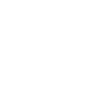

In [111]:
colorview( Gray, img[:,:,1])

In [57]:
labels = dataset["train_labels"]; @show lbls[1:4], typeof(lbls), length(labels);

(lbls[1:4], typeof(lbls), length(labels)) = (UInt8[0x07, 0x03, 0x06, 0x06], Matrix{UInt8}, 11959)


In [117]:
nTrain = length(labels)

11959

In [118]:
using BenchmarkTools

In [119]:
@btime trainData = vcat([hcat(float.(imgs[i])...)  for i in 1:nTrain]...);

  2.185 ms (83215 allocations: 2.32 MiB)


In [121]:
trainLabels = labels[1:nTrain];

# References
- [ ] [MedMNIST v2 - A large-scale lightweight benchmark
for 2D and 3D biomedical image classification](https://arxiv.org/pdf/2110.14795.pdf)
| Name | Source | Data  Modality | Task (# Classes / Labels) | # Samples | # Training / Validation / Test |
|-|-|-|-|-|-|
| BloodMNIST  | Acevedo et al. |  Blood Cell Microscope | MC (8) | 17,092  | 11,959 / 1,712 / 3,421 |
- [ ] [\[05x08\] Intro to Artificial Neural Networks with Flux.jl (1 of 2); Julia Supervised Machine Learning](https://www.youtube.com/watch?v=zmlulaxatRs)